In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Defining Heston Model parameters

In [15]:
S0 = 100        # Initial stock price
K = 100         # Strike price
T = 1           # Time to maturity (in years)
r = 0.05        # Risk-free interest rate
q = 0.02        # Dividend yield
v0 = 0.1        # Initial volatility
kappa = 2.0     # Mean reversion rate
theta = 0.1     # Long-term volatility
sigma = 0.2     # Volatility of volatility
rho = -0.5      # Correlation between Brownian motions
num_simulations = 10000  # Number of Monte Carlo simulations
num_time_steps = 252      # Number of time steps (daily)

Generate Random numbers for Monte Carlo simulation

In [16]:
np.random.seed(42)
z1 = np.random.normal(size=(num_simulations, num_time_steps))
z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.normal(size=(num_simulations, num_time_steps))

Simulate stock price paths using Heston model

In [17]:
dt = T / num_time_steps
vt = np.zeros_like(z1)
vt[:, 0] = v0
St = np.zeros_like(z1)
St[:, 0] = S0

Calculate European call option prices for each simulation path

In [18]:
option_prices = np.zeros((num_simulations, num_time_steps))
for i in range(1, num_time_steps):
    vt[:, i] = vt[:, i - 1] + kappa * (theta - vt[:, i - 1]) * dt + sigma * np.sqrt(np.maximum(0, vt[:, i - 1] * dt)) * z2[:, i]
    St[:, i] = St[:, i - 1] * np.exp((r - q - 0.5 * vt[:, i]) * dt + np.sqrt(np.maximum(0, vt[:, i] * dt)) * z1[:, i])
    payoffs = np.maximum(St[:, i] - K, 0)  # Payoff for call option
    option_prices[:, i] = payoffs * np.exp(-r * (T - i * dt))

Calculate European call option price

In [19]:
european_option_price = np.mean(option_prices[:, -1])

print(f"European Call Option Price:{european_option_price:.2f}")

European Call Option Price:10.94


Plot European call option prices

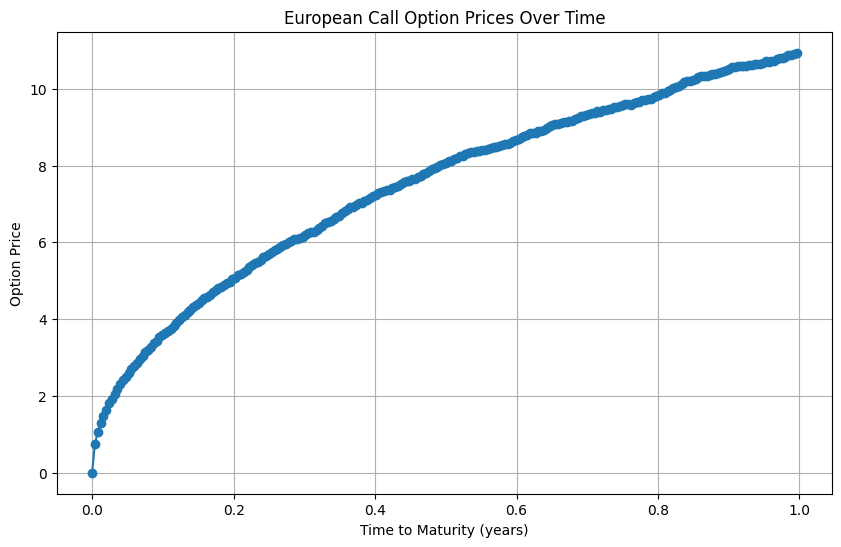

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, T, T/num_time_steps), option_prices.mean(axis=0), marker='o', linestyle='-')
plt.title('European Call Option Prices Over Time')
plt.xlabel('Time to Maturity (years)')
plt.ylabel('Option Price')
plt.grid(True)
plt.show()

Calculate European put option prices for each simulation path

In [21]:
option_prices = np.zeros((num_simulations, num_time_steps))
for i in range(1, num_time_steps):
    vt[:, i] = vt[:, i - 1] + kappa * (theta - vt[:, i - 1]) * dt + sigma * np.sqrt(np.maximum(0, vt[:, i - 1] * dt)) * z2[:, i]
    St[:, i] = St[:, i - 1] * np.exp((r - q - 0.5 * vt[:, i]) * dt + np.sqrt(np.maximum(0, vt[:, i] * dt)) * z1[:, i])
    payoffs = np.maximum(K - St[:, i], 0)  # Payoff for put option
    option_prices[:, i] = payoffs * np.exp(-r * (T - i * dt))

Calculate European put option price

In [22]:
european_option_price = np.mean(option_prices[:, -1])

print(f"European Put Option Price:{european_option_price:.2f}")

European Put Option Price:13.22


Plot European put option prices

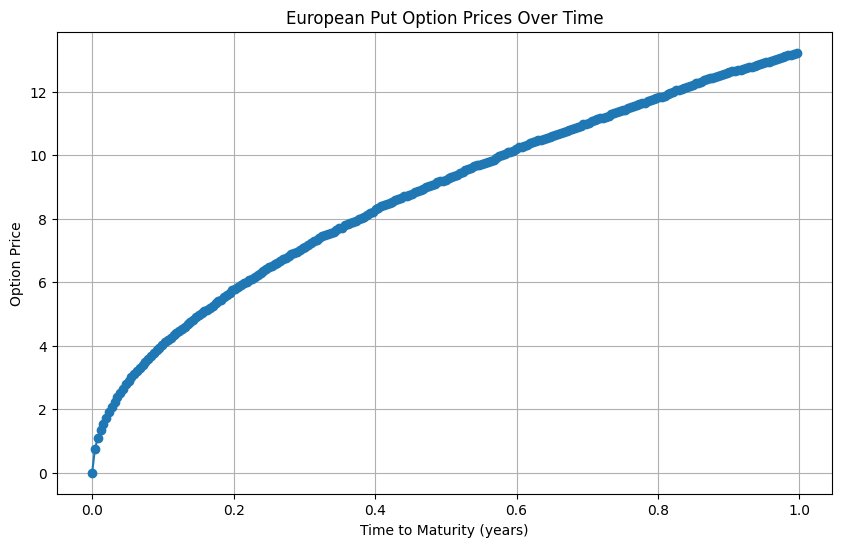

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, T, T/num_time_steps), option_prices.mean(axis=0), marker='o', linestyle='-')
plt.title('European Put Option Prices Over Time')
plt.xlabel('Time to Maturity (years)')
plt.ylabel('Option Price')
plt.grid(True)
plt.show()

Calculate American call option prices for each simulation path

In [24]:
option_prices = np.zeros((num_simulations, num_time_steps))
for i in range(1, num_time_steps):
    vt[:, i] = vt[:, i - 1] + kappa * (theta - vt[:, i - 1]) * dt + sigma * np.sqrt(np.maximum(0, vt[:, i - 1] * dt)) * z2[:, i]
    St[:, i] = St[:, i - 1] * np.exp((r - q - 0.5 * vt[:, i]) * dt + np.sqrt(np.maximum(0, vt[:, i] * dt)) * z1[:, i])
    payoffs = np.maximum(St[:, i] - K, 0)
    option_prices[:, i] = payoffs * np.exp(-r * (T - i * dt))

Calculate American call option price by taking the maximum of exercise and continuation values

In [25]:
american_option_prices = np.zeros(num_time_steps)
for i in range(num_time_steps - 2, -1, -1):
    discounted_payoff = np.maximum(St[:, i] - K, 0) * np.exp(-r * (T - i * dt))
    american_option_prices[i] = np.maximum(discounted_payoff, american_option_prices[i + 1]).mean()

In [26]:
print(f"American Call Option Price:{american_option_prices[0]:.2f}")

American Call Option Price:72.29


Plot American call option prices

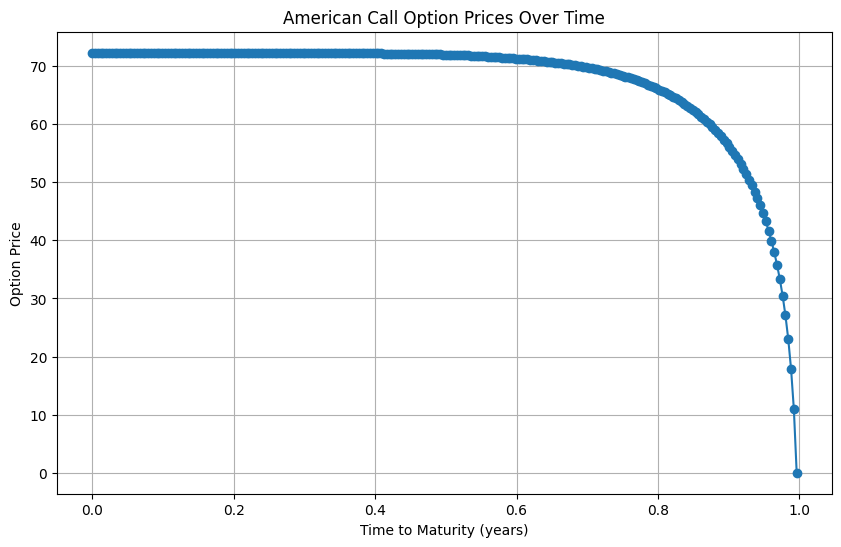

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, T, T/num_time_steps), american_option_prices, marker='o', linestyle='-')
plt.title('American Call Option Prices Over Time')
plt.xlabel('Time to Maturity (years)')
plt.ylabel('Option Price')
plt.grid(True)
plt.show()

Calculate American put option prices for each simulation path

In [28]:
option_prices = np.zeros((num_simulations, num_time_steps))
for i in range(1, num_time_steps):
    vt[:, i] = vt[:, i - 1] + kappa * (theta - vt[:, i - 1]) * dt + sigma * np.sqrt(np.maximum(0, vt[:, i - 1] * dt)) * z2[:, i]
    St[:, i] = St[:, i - 1] * np.exp((r - q - 0.5 * vt[:, i]) * dt + np.sqrt(np.maximum(0, vt[:, i] * dt)) * z1[:, i])
    payoffs = np.maximum(K - St[:, i], 0)  # Payoff for put option
    option_prices[:, i] = payoffs * np.exp(-r * (T - i * dt))

Calculate American put option price by taking the maximum of exercise and continuation values

In [29]:
american_option_prices = np.zeros(num_time_steps)
american_option_prices[-1] = np.mean(option_prices[:, -1])
for i in range(num_time_steps - 2, -1, -1):
    discounted_payoff = np.maximum(K - St[:, i], 0) * np.exp(-r * (T - i * dt))
    american_option_prices[i] = np.maximum(discounted_payoff, american_option_prices[i + 1]).mean()

In [30]:
print(f"American Put Option Price:{american_option_prices[0]:.2f}")

American Put Option Price:53.16


Plot American put option prices

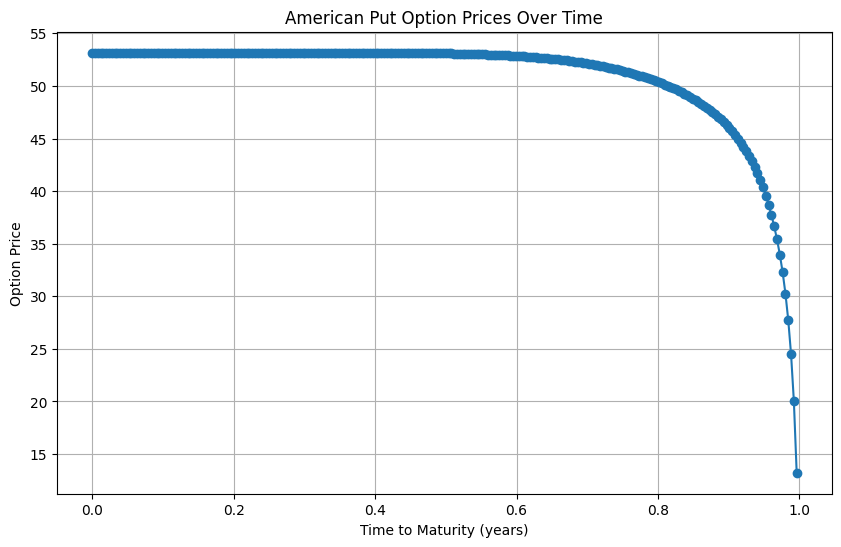

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, T, T/num_time_steps), american_option_prices, marker='o', linestyle='-')
plt.title('American Put Option Prices Over Time')
plt.xlabel('Time to Maturity (years)')
plt.ylabel('Option Price')
plt.grid(True)
plt.show()